In [1]:
import pandas as pd
import spacy

df = pd.read_csv("test_cloud_lemma.csv")
df3 = pd.read_csv("test_cloud_porter.csv")


In [16]:
df_list = []
for i in range(11):
    data = pd.read_csv("word_freq_in_docs_{}.csv".format(i))
    df_list.append(data)
    
docs = pd.read_csv("all_documents.csv", usecols=["title", "abstract"])
df_all = pd.concat(df_list)
df_all.fillna(0, inplace=True)
df_all.drop(["level_0", "unnamed:0"], axis=1, inplace=True)
df_all.reset_index(inplace=True)


In [41]:
docs.iloc[df_all[df_all['spread']>0].index].shape

(1162, 2)

In [2]:
sp = spacy.load("en_core_web_sm")

In [4]:
stop_words = sp.Defaults.stop_words
print("There {} stop words in our set".format(len(stop_words)))

There 326 stop words in our set


In [7]:
df_stop = pd.DataFrame(stop_words, columns=['word'])
df2 = df[~df['word'].isin(df_stop['word'])]

<AxesSubplot:title={'center':'Tokenized'}>

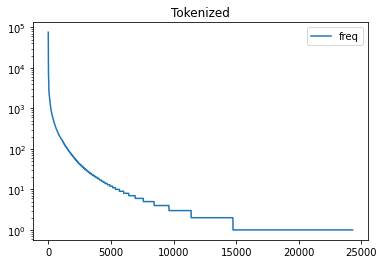

In [11]:
df.plot(y='freq', logy=True, use_index=True, title="Tokenized")

<AxesSubplot:title={'center':'Stop Word Removed'}>

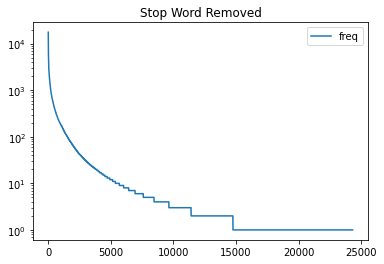

In [13]:
df2.plot(y='freq', logy=True, use_index=True, title="Stop Word Removed")

<AxesSubplot:title={'center':'After Stemming using Porter '}>

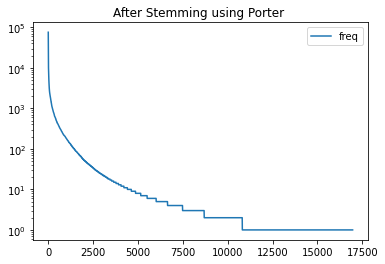

In [14]:
df3.plot(y='freq', logy=True, use_index=True, title="After Stemming using Porter ")